Data Set: Fire Incidents in City of Pittsburgh  https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

Using the number of fires weighted by the response as indicated by the alarm type of the fire we can find the neighborhoods that have the most fires and the associated danger and disruption.

In [1]:
!pip install --upgrade geopandas

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: geopandas in /home/jupyter-ltm21/.local/lib/python3.8/site-packages (0.13.2)


In [4]:
fires=pd.read_csv(r"fires/fireincidents.csv")
fires=fires[pd.isna(fires['neighborhood'])==False]
fires['neighborhood'].replace("Mount Oliver Borough","Mt. Oliver",inplace=True)

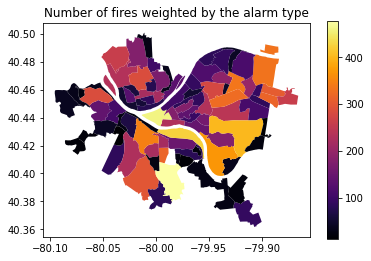

In [5]:
neighborhoods=gpd.read_file(r"neighborhoods/Neighborhoods_.shp")
weighted_fires=pd.DataFrame({'hood':fires['neighborhood'].unique()})
weighted_fires['weighted_fires'] = weighted_fires['hood'].apply(
    lambda nb:sum( fires[fires['neighborhood']==nb]["alarms"]+1)
)
fire_map = neighborhoods.merge(weighted_fires)
fire_map.plot(
    column='weighted_fires', legend=True,cmap="inferno",missing_kwds={"color": "tgrey"})
plt.title("Number of fires weighted by the alarm type");

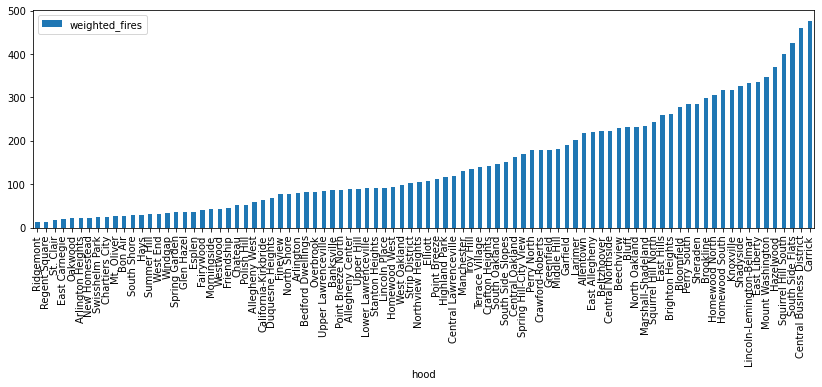

In [6]:
weighted_fires.sort_values("weighted_fires").plot(kind='bar',x='hood',figsize=(14,4));

Based on minimizing fire disruption, Ridgemont is the best neighborhood followed by Regent Square, St. Clair, East Carnegie and Oakwood. The worst neighborhoods are Carrick, Central Business District, Southside Flats, Squirrel Hill South and Hazelwood.